In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Generate clusters

In [58]:
x_dim = 2; num_clusters = 2; samples = int(5e4)

In [59]:
mu = []

for i in range(num_clusters):
    centroid = 10*np.random.randn(x_dim,1)
    print(f'Cluster {i+1} centroid: {centroid}')
    mu.append(centroid)

Cluster 1 centroid: [[ 7.62421241]
 [-8.92837243]]
Cluster 2 centroid: [[-16.20166001]
 [  1.41278952]]
Cluster 3 centroid: [[ 3.00983329]
 [-4.26427017]]


In [60]:
cluster = []

for i in range(num_clusters):
    cluster.append(mu[i] + np.random.randn(x_dim,samples))

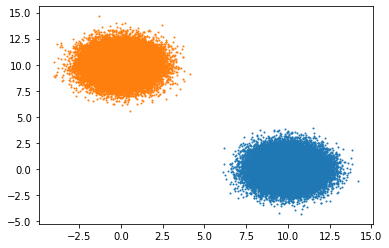

In [61]:
for i in range(num_clusters):
    plt.scatter(cluster[i][0],cluster[i][1],s=1)

plt.show()

In [62]:
X = np.concatenate(cluster, axis=1) # concatenate clusters

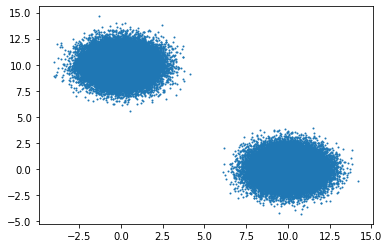

In [63]:
plt.scatter(X[0],X[1],s=1)
plt.show()

### Online algorithm

In [64]:
W = np.random.randn(num_clusters,x_dim)
theta = np.zeros((num_clusters,1))
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,num_clusters*samples))

idx = np.random.permutation(num_clusters*samples)

for epoch in range(1):

    for t in range(num_clusters*samples):

        x = X[:,idx[t]].reshape((2,1))

        a = -W@x + theta

        c = np.argmin(a)
        y = np.zeros((num_clusters,1)); y[c] = 1
        z = -a[c]

        n += y

        for i in range(num_clusters):
            for j in range(x_dim):
                W[i,j] += y[i]*(2*x[j] - W[i,j])/n[i]

            theta[i] += y[i]*(z - theta[i])/n[i]

        for j in range(x_dim):
            W[i,j] += y[i]*(2*x[j] - W[i,j])/n[i]

        theta[i] += y[i]*(z - theta[i])/n[i]

    for j in range(num_clusters):
        Y[j,idx[t]] = y[j]

plt.show()

Cluster 1 mean: [9.99651506e+00 2.00803910e-03]
Cluster 2 mean: [5.58244949e-03 9.99616502e+00]
